# Amazon Web Scraper Portfolio Project

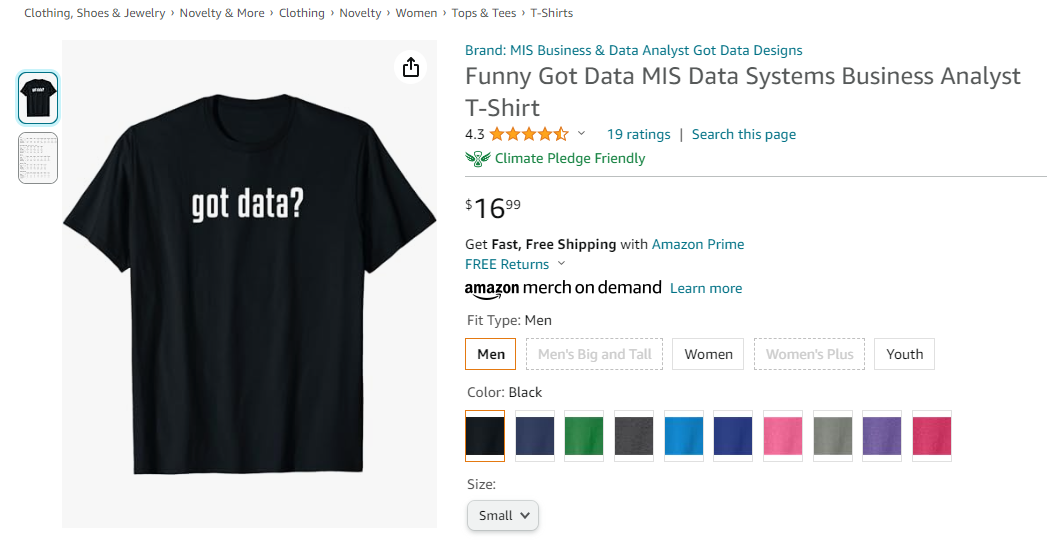

In [1]:
# Importing libraries.

import requests
from bs4 import BeautifulSoup
import json
import datetime
import csv
import pandas as pd
import smtplib
import time

In [2]:
# Connecting to the Amazon website.

url = r'https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ?customId=B0752XJYNL&customizationToken=MC_Assembly_1%23B0752XJYNL&th=1&psc=1'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

# Extracting the product title and price.

title = soup.find(id = 'productTitle').text.strip()
price = float(json.loads(soup.find('div', class_ = 'cardRoot')['data-components'])['1']['price']['displayString'].strip('$'))

# Visualizing the data obtained.

print(title)
print(price)

# Getting today's date.

today = datetime.date.today()

print(today)

Funny Got Data MIS Data Systems Business Analyst T-Shirt
16.99
2024-02-28


In [3]:
# Creating a CSV file and adding the data.
# If the file already exists, it is truncated and then the new data is added.

header = ['Title', 'Price', 'Date']
data = [title, price, today]

with open(r'Amazon Web Scraper Dataset.csv', 'w', newline = '', encoding = 'utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

# Verifying the data of the created file.

df = pd.read_csv(r'C:\Users\marti\Python\Portfolio Projects\Amazon Web Scraper\Amazon Web Scraper Dataset.csv')

df

,Title,Price,Date
0,Funny Got Data MIS Data Systems Business Analy...,16.99,2024-02-28


In [4]:
# Appending data to the CSV file.

with open(r'Amazon Web Scraper Dataset.csv', 'a+', newline = '', encoding = 'utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

# Verifying the new data of the file.

df = pd.read_csv(r'C:\Users\marti\Python\Portfolio Projects\Amazon Web Scraper\Amazon Web Scraper Dataset.csv')

df

,Title,Price,Date
0,Funny Got Data MIS Data Systems Business Analy...,16.99,2024-02-28
1,Funny Got Data MIS Data Systems Business Analy...,16.99,2024-02-28


In [5]:
# Defining a function to send me an email.

try:
    from_addr = 'your.programming.self@hotmail.com'

    server = smtplib.SMTP('smtp.office365.com',587)
    server.ehlo()
    server.starttls()
    server.ehlo()
    server.login(from_addr, '************')
    
    subject = "The shirt you want is below $15! Now is your chance to buy it!"
    body = "Martín,\n\nThis is the moment we have been waiting for. Now is your chance to pick up the shirt of your dreams. Don't mess it up!\n\nLink here: " + url +"\n\nRegards,\n\nYour Programming Self."

    msg = f'Subject: {subject}\n\n{body}'.encode('utf-8')

    server.sendmail(from_addr, 'martinevigliante@gmail.com', msg)

    print("Email sent successfully.")

except Exception as e:
    print(f"Error sending email: {e}.")

finally:
    server.quit()

Email sent successfully.


# Sample Mail

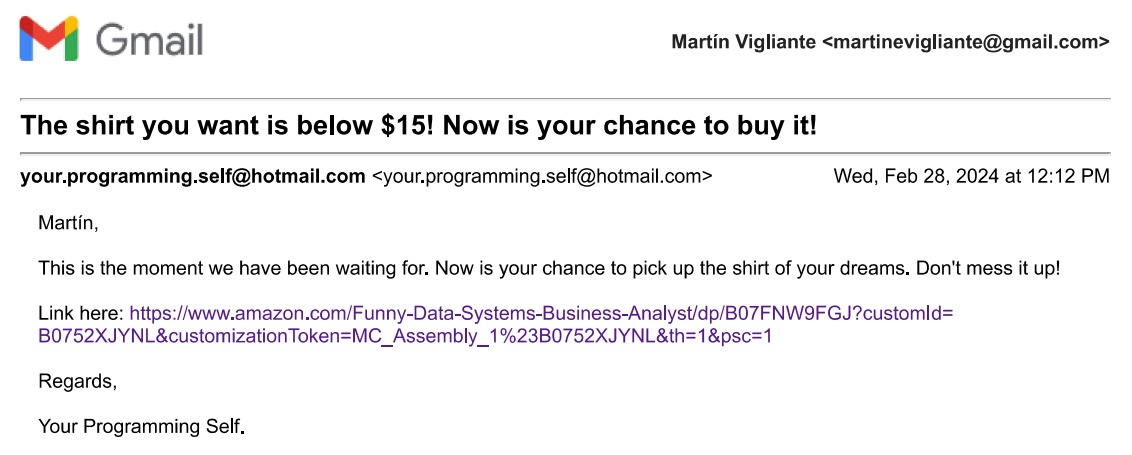

In [ ]:
# Creating functions based on everything seen above and then executing them.

# Defining a function to overwrite the file by leaving the column names in the first row.
# In case the file does not exist, it is created.

def reset_file():
    header = ['Title', 'Price', 'Date']

    with open(r'Amazon Web Scraper Dataset.csv', 'w', newline = '', encoding = 'utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(header)

# Defining a function to send me an email.

def send_email():
    try:
        from_addr = 'your.programming.self@hotmail.com'

        server = smtplib.SMTP('smtp.office365.com',587)
        server.ehlo()
        server.starttls()
        server.ehlo()
        server.login(from_addr, '************')
        
        url = r'https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ?customId=B0752XJYNL&customizationToken=MC_Assembly_1%23B0752XJYNL&th=1&psc=1'
        
        subject = "The shirt you want is below $15! Now is your chance to buy it!"
        body = "Martín,\n\nThis is the moment we have been waiting for. Now is your chance to pick up the shirt of your dreams. Don't mess it up!\n\nLink here: " + url +"\n\nRegards,\n\nYour Programming Self."
        
        msg = f'Subject: {subject}\n\n{body}'.encode('utf-8')

        server.sendmail(from_addr, 'martinevigliante@gmail.com', msg)

        print("Email sent successfully.")

    except Exception as e:
        print(f"Error sending email: {e}.")

    finally:
        server.quit()

# Defining a function to query the desired data from the website and add them to the created file.
# Also, an email is automatically sent if the price of the product is lower than the reference one.

def check_price():
    
    url = r'https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ?customId=B0752XJYNL&customizationToken=MC_Assembly_1%23B0752XJYNL&th=1&psc=1'
    
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    title = soup.find(id = 'productTitle').text.strip()
    price = float(json.loads(soup.find('div', class_ = 'cardRoot')['data-components'])['1']['price']['displayString'].strip('$'))
        
    today = datetime.date.today()
         
    header = ['Title', 'Price', 'Date']
    data = [title, price, today]
    
    with open(r'Amazon Web Scraper Dataset.csv', 'a+', newline = '', encoding = 'utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(data)

    if price < 15:
        send_email()

# Defining a counter function that checks the price every 24 hours.

def check_daily_price():
    while True:
        check_price()
        time.sleep(86400)

# Executing all.
# The file is created or truncated and the column names are added.
# Every 24 hours the desired product information is checked on Amazon and added to a new file row.
# If the price is lower than the fixed price, an email is sent to my personal mailbox to notify me.

reset_file()
check_daily_price()

Email sent successfully.
